The Keywords count is :  {'engineering': 239, 'developer': 128, 'designers': 27, 'devops': 62, 'research': 48}

The output of basic operations is:
Sum: 504
Minimum Value: 27
Maximum Value: 239
Mean: 100.8
Median: 62
Mode: 239


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

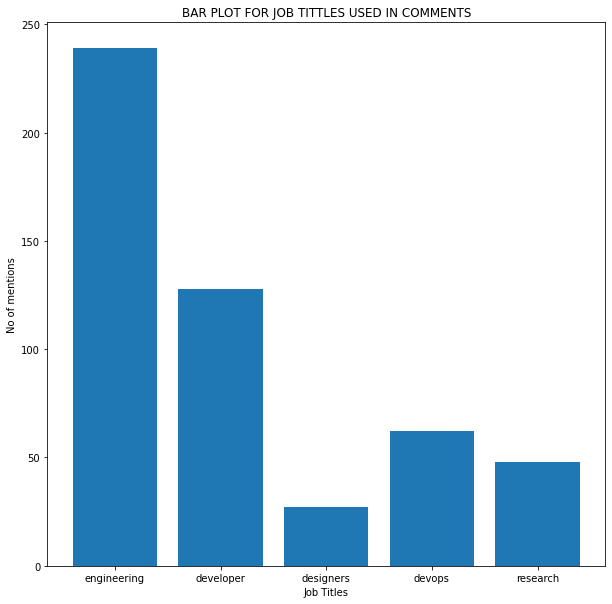

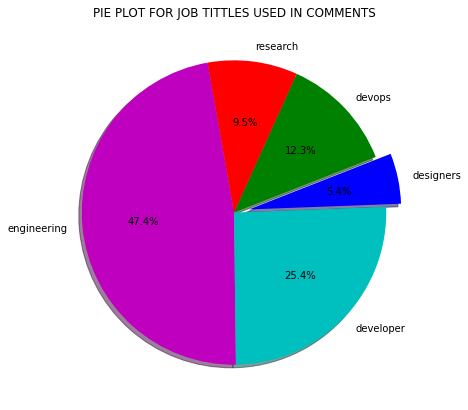

In [17]:
# Ran the code using GOOGLE COLAB

# Covered requirements:
# It must pull data from the internet (typically webpages)
# It must pull data from 5 different webpages (using pandas, this page uses requests) -- This is 3rd page
# It must do some basic calculations on numerical data from 3 of those pages (mean, median, mode, min, max)
# It must make use of your own methods where appropriate
# It must produce at least 3 charts from 3 of those pages
# It must save the data to a file


# Covered Additional requirements:
# The 5 webpages are from 5 different websites
# It does basic calculations on all 5 of those webpages
# It uses BeautifulSoup on this webpages and parses the html -- This is 2nd page using bs4
# It produces 5 charts from all 5 of the webpages
# It saves the charts in addition to the data, to image files


import pandas as pd
import keyword
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import statistics as st
from google.colab import files


use_url = "https://news.ycombinator.com/item?id=29782099"
get_response = requests.get(use_url)

soup = BeautifulSoup(get_response.content, "html.parser")

all_elements = soup.find_all(class_="ind", indent=0)

all_comments = [every_element.find_next(class_="comment") for every_element in all_elements]

all_keywords = { "engineering": 0, "developer": 0, "designers": 0, "devops": 0, "research": 0}

for comment in all_comments:
    comment_text = comment.get_text().lower()
    words = comment_text.split(" ")
    words = {w.strip(".,/?!:;@#*$") for w in words}

    for k in all_keywords:
        if k in words:
            all_keywords[k] += 1
print("The Keywords count is : ", all_keywords)


# Performing basic operations 
Key_values_sum = sum(all_keywords.values())
print ("\n" + "The output of basic operations is:" + "\n" + "Sum:" ,Key_values_sum)

Key_values_min = min(all_keywords.values())
print ("Minimum Value:" ,Key_values_min)

Key_values_max = max(all_keywords.values())
print ("Maximum Value:" ,Key_values_max)

Key_values_mean = Key_values_sum/len(all_keywords.values())
print ("Mean:" ,Key_values_mean)

Key_values_median = st.median(all_keywords.values())
print ("Median:" ,Key_values_median)

magnitude_mode = st.mode(all_keywords.values())
print ("Mode:" ,magnitude_mode)

#graph 1
#bar plot
f = plt.figure(figsize=(10, 10))
plt.bar(all_keywords.keys(), all_keywords.values())
plt.xlabel("Job Titles")
plt.ylabel("No of mentions")
plt.title("BAR PLOT FOR JOB TITTLES USED IN COMMENTS")
plt.autoscale()
plt.savefig('graph3-1.png')                                                     #Saving the Frist graph
files.download('graph3-1.png')                                                  #Downloading the First graph

print ("\n\n")

#graph 2
#pie chart
f = plt.figure(figsize=(7,7))
colors=['m','c','b','g','r']
plt.pie(all_keywords.values(), labels= all_keywords.keys(), colors=colors, pctdistance=0.6, startangle=100, 
        shadow=True, explode=(0,0,.1,0,0), autopct='%1.1f%%', radius=1, counterclock=True)
plt.title("PIE PLOT FOR JOB TITTLES USED IN COMMENTS")
plt.savefig('graph3-2.png',dpi=100)                                             #Saving the Second graph
files.download('graph3-2.png')                                                  #Downloaing the Second graph
